# Tensorflow intro

This tutorial shows the basic usage of tensorflow to train neural networks

In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import datetime

In [2]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification

# Simple NN for classification

## Data processing
Read data and convert them to numerical inputs

In [4]:
X, y = make_classification(n_samples=20000, n_features=8, n_informative=5, 
                           n_redundant=0, n_classes=2, random_state=1) #syntentic dataset 

#ndicates the number of informative features: predicting the target variableative
#redundant feat: linear comnos of info feat
#classes: target labels

In [5]:
X, X_test, y, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
#This means the train and test sets will have the same proportion of class labels as the original dataset

In [7]:
X_train, X_dev, y_train, y_dev = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
#Validation sets

In [8]:
print('train size: {}, target_ratio: {:.3f}'.format(X_train.shape, np.mean(y_train)))
print('test size: {}, target_ratio: {:.3f}'.format(X_test.shape, np.mean(y_test)))
print('dev size: {}, target_ratio: {:.3f}'.format(X_dev.shape, np.mean(y_dev)))

#ukáže vyváženost


train size: (12800, 8), target_ratio: 0.502
test size: (4000, 8), target_ratio: 0.501
dev size: (3200, 8), target_ratio: 0.502


In [13]:
X_train.shape

(12800, 8)

## Building a simple model with tf.keras

Very useful documentations with many examples and detailed explanation of everything you might need:
 - https://www.tensorflow.org/api_docs/python/tf/keras/
 - https://keras.io/api/

Contain everything about:
  - Model building: Activations, Losses, Optimizers, Regularization
  - Data processing
  - Pretrained models and datasets
  - Automatic differentiation
  - ...

  

### Model speficication

three APIs for building the model
   - sequential - easy to code, but less flexible - we will use it sometimes
   - functional - flexible and still easy to code - we will use it the most
   - model subclassing - rather complicated and not very much used - we will skip it

#### Sequential API

(https://www.tensorflow.org/guide/keras/sequential_model)

Easy to code but <span style="color:red"> NOT </span> appropriate when:

- Your model has multiple inputs or multiple outputs
- Any of your layers has multiple inputs or multiple outputs
- You need to do layer sharing
- You want non-linear topology (e.g. a residual connection, a multi-branch model)

The Sequential API and the Functional API are two different ways to create and define models in TensorFlow/Keras, each with its own strengths and use cases.

### Sequential API:
- **Simple and Linear**: The Sequential API is straightforward and allows you to create models layer-by-layer in a linear manner.
- **For Simple Models**: It's ideal for building simple models where the data flows sequentially through the layers, such as feedforward neural networks or CNNs with a single input and output.
- **Limited Flexibility**: It has limited flexibility because it only supports models with a single input and single output. You cannot create models with branching or merging layers using the Sequential API.
- **Convenient for Beginners**: It's often preferred by beginners due to its simplicity and ease of use.

### Functional API:
- **Flexible and Powerful**: The Functional API is more flexible and powerful, allowing you to create models with complex network architectures, including multiple inputs and outputs, branching, and merging layers.
- **For Complex Models**: It's suitable for building more complex models, such as models with residual connections, multi-input/multi-output models, and models with shared layers.
- **Explicit Input and Output Handling**: In the Functional API, you explicitly define the input and output layers, making it easier to work with multiple inputs and outputs.
- **Better for Research and Advanced Users**: It's commonly used by researchers and advanced users who need more control over the model architecture.

### When to Use Which:
- **Sequential API**: Use the Sequential API when you're building simple, linear models with a single input and output, such as feedforward neural networks or simple CNNs.
- **Functional API**: Use the Functional API when you need more flexibility and control over the model architecture, such as when building complex models with multiple inputs and outputs, branching, or shared layers.

### Example:
Here's a simple example of building the same model using both APIs:

**Sequential API:**
```python
from tensorflow.keras import Sequential, layers

model = Sequential([
    layers.Dense(64, activation='relu', input_shape=(input_dim,)),
    layers.Dense(10, activation='softmax')
])
```

**Functional API:**
```python
from tensorflow.keras import Model, layers

inputs = layers.Input(shape=(input_dim,))
x = layers.Dense(64, activation='relu')(inputs)
outputs = layers.Dense(10, activation='softmax')(x)

model = Model(inputs, outputs)
```

In this example, both approaches create the same model with a single input and output, but the Functional API provides more flexibility and control over the model architecture.

In [10]:
# Specification A)

model = tf.keras.Sequential([
    tf.keras.layers.InputLayer([X_train.shape[1],]), # Create input layer with 'input data' neurons
    tf.keras.layers.Dense(10, activation="relu"), # Create hidden layer with 10 neurons and ReLU activation
    tf.keras.layers.Dense(1, activation="sigmoid"), # Create output layer with one neuron and sigmoid activation
])

model.summary()
#Input layer je 8 neuronu -> mam 8 features


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                90        
                                                                 
 dense_1 (Dense)             (None, 1)                 11        
                                                                 
Total params: 101
Trainable params: 101
Non-trainable params: 0
_________________________________________________________________


In [14]:
# Specification B)

model = tf.keras.Sequential()
model.add(tf.keras.Input(shape=(X_train.shape[1],)))
model.add(tf.keras.layers.Dense(10, activation="relu"))
model.add(tf.keras.layers.Dense(1, activation="sigmoid"))

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 10)                90        
                                                                 
 dense_3 (Dense)             (None, 1)                 11        
                                                                 
Total params: 101
Trainable params: 101
Non-trainable params: 0
_________________________________________________________________


#### Functional API

(https://www.tensorflow.org/guide/keras/functional)

The Keras functional API is a way to create models that are more flexible than the tf.keras.Sequential API. The functional API can handle models with non-linear topology, shared layers, and even multiple inputs or outputs.

The main idea is that a deep learning model is usually a directed acyclic graph (DAG) of layers. So the functional API is a way to build graphs of layers.



In [15]:
inputs = tf.keras.Input(shape=(X_train.shape[1],))

hidden = tf.keras.layers.Dense(10)(inputs)
hidden = tf.keras.activations.relu(hidden)
hidden = tf.keras.layers.Dense(1)(hidden)
outputs = tf.keras.activations.sigmoid(hidden)

model = tf.keras.Model(inputs=inputs, outputs=outputs, name='Model')

In [16]:
model.summary()

Model: "Model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 8)]               0         
                                                                 
 dense_4 (Dense)             (None, 10)                90        
                                                                 
 tf.nn.relu (TFOpLambda)     (None, 10)                0         
                                                                 
 dense_5 (Dense)             (None, 1)                 11        
                                                                 
 tf.math.sigmoid (TFOpLambda  (None, 1)                0         
 )                                                               
                                                                 
Total params: 101
Trainable params: 101
Non-trainable params: 0
_______________________________________________________________

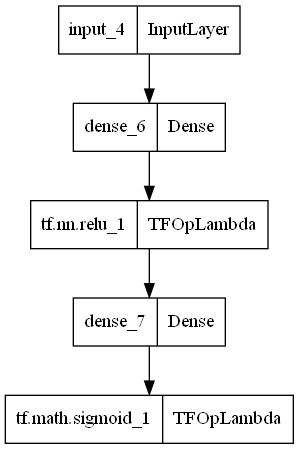

In [35]:

tf.keras.utils.plot_model(model)

### Model compilation and training

In [17]:
# compile the model with selected optimizer, loss and metrics
model.compile(
        optimizer=tf.optimizers.Adam(), # Several other possibilities for optimizers 
        loss=tf.losses.BinaryCrossentropy(), # Select the proper loss for the task
        metrics=[tf.keras.metrics.AUC(), tf.keras.metrics.BinaryAccuracy()], # Select the proper metrics for the task
)


#For regression tasks, tf.losses.MeanSquaredError()

In [24]:
print('\n>>> Bias of the last layers:')
print(model.layers[3].weights[1].numpy())

print('\n>>> Kernel of the last layers:') #Kernel refers to the weight matric from the mentinoned layer
print(model.layers[3].weights[0].numpy())

print('\n>>> Bias of the first layers:')
print(model.layers[1].weights[1].numpy())

print('\n>>> Kernel of the first layers:')
print(model.layers[1].weights[0].numpy())

#I guess only some init weights?


>>> Bias of the last layers:
[-0.17000008]

>>> Kernel of the last layers:
[[ 2.2186315 ]
 [-2.077674  ]
 [ 0.6896167 ]
 [ 0.87723047]
 [-2.413737  ]
 [-0.7869727 ]
 [ 2.166464  ]
 [ 3.1737132 ]
 [ 1.5944035 ]
 [ 2.83186   ]]

>>> Bias of the first layers:
[-1.2135944   0.49064967  1.0362744   1.2408949   0.38448688 -0.24221994
 -1.0867906  -1.7819648  -0.768613   -1.7855418 ]

>>> Kernel of the first layers:
[[-7.22754478e-01 -1.13089621e+00  1.30688354e-01  2.63837665e-01
   9.08078253e-01  1.58591926e+00 -4.53085452e-01 -4.70656186e-01
   3.02479446e-01  1.37053490e+00]
 [-1.76413159e-03 -3.99489664e-02 -3.13970074e-02  5.16231172e-02
  -8.23013857e-03  1.26701146e-01 -3.45270745e-02 -5.55979498e-02
  -1.29643148e-02  7.33728483e-02]
 [-2.77393132e-01  1.23936152e+00  4.24409598e-01 -5.07162035e-01
  -1.16471505e+00  9.51085567e-01  9.91107166e-01  4.39952910e-01
  -2.23607346e-01 -1.16097200e+00]
 [ 8.44831765e-01 -7.62415767e-01 -3.75716269e-01  8.97019207e-02
   9.88683760e-01 -

In [20]:
# train the model with default setting
model.fit(X_train, y_train, batch_size=64, epochs=100)

Epoch 1/100
200/200 [==============================] - 1s 883us/step - loss: 0.7042 - auc: 0.6880 - binary_accuracy: 0.5995
Epoch 2/100
200/200 [==============================] - 0s 909us/step - loss: 0.5118 - auc: 0.8466 - binary_accuracy: 0.7420
Epoch 3/100
200/200 [==============================] - 0s 851us/step - loss: 0.4301 - auc: 0.8918 - binary_accuracy: 0.8129
Epoch 4/100
200/200 [==============================] - 0s 871us/step - loss: 0.3857 - auc: 0.9157 - binary_accuracy: 0.8410
Epoch 5/100
200/200 [==============================] - 0s 891us/step - loss: 0.3543 - auc: 0.9304 - binary_accuracy: 0.8601
Epoch 6/100
200/200 [==============================] - 0s 856us/step - loss: 0.3296 - auc: 0.9402 - binary_accuracy: 0.8730
Epoch 7/100
200/200 [==============================] - 0s 833us/step - loss: 0.3093 - auc: 0.9469 - binary_accuracy: 0.8846
Epoch 8/100
200/200 [==============================] - 0s 820us/step - loss: 0.2932 - auc: 0.9522 - binary_accuracy: 0.8923
Epoch 9/

In [21]:
# Evaluate the model and predict for the test data
model.evaluate(X_test, y_test)
test_pred = model.predict(X_test)

125/125 [==============================] - 0s 1ms/step - loss: 0.1858 - auc: 0.9784 - binary_accuracy: 0.9392


In [25]:
for pred, true in zip(test_pred, y_test[0:10]):
    print('{} - {:.2f}'.format(true, pred[0]))

1 - 0.46
0 - 0.28
0 - 0.17
1 - 1.00
0 - 0.00
0 - 0.01
1 - 0.99
0 - 0.00
1 - 1.00
1 - 1.00


### Add early stopping and regularization

In [26]:
# Input layer
inputs = tf.keras.Input(shape=(X_train.shape[1]))

# Hidden layer with regularization and ReLU
hidden = tf.keras.layers.Dense(10, kernel_regularizer=tf.keras.regularizers.l2(0.001))(inputs)
hidden = tf.keras.activations.relu(hidden)

# Output layer with regularization and sigmoid
outputs = tf.keras.layers.Dense(1, kernel_regularizer=tf.keras.regularizers.l2(0.001))(hidden)
outputs = tf.keras.activations.sigmoid(outputs)

model = tf.keras.Model(inputs=inputs, outputs=outputs, name='RegularizedModel')

model.compile(
        optimizer=tf.optimizers.Adam(),
        loss=tf.losses.BinaryCrossentropy(),
        metrics=[tf.keras.metrics.AUC(), tf.keras.metrics.BinaryAccuracy()],
)

model.summary()

Model: "RegularizedModel"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 8)]               0         
                                                                 
 dense_6 (Dense)             (None, 10)                90        
                                                                 
 tf.nn.relu_1 (TFOpLambda)   (None, 10)                0         
                                                                 
 dense_7 (Dense)             (None, 1)                 11        
                                                                 
 tf.math.sigmoid_1 (TFOpLamb  (None, 1)                0         
 da)                                                             
                                                                 
Total params: 101
Trainable params: 101
Non-trainable params: 0
____________________________________________________

In [33]:
epochs = 200

early_call = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss', patience=10, restore_best_weights=True
)
#patience = if not improving over 10 epochs stop, restore_best_weights = remembers its best results

model.fit(X_train,
          y_train,
          epochs=epochs,
          validation_data=(X_dev, y_dev), # for evaluating the model at the end of each epoch, monitor on unseen data
          callbacks=[early_call])

#Train
#loss: 0.2563 (binary_entropy - want smaller numero)
#auc_1: 0.9689 (auc of the train - bigger is better)
#binary_accuracy: 0.9093 #proportion of correctly classified instances Correct/All data

#Validation set
#val_loss: 0.2569 
#val_auc_1: 0.9687
#val_binary_accuracy: 0.9053

Epoch 1/200
400/400 [==============================] - 0s 1ms/step - loss: 0.2233 - auc_1: 0.9823 - binary_accuracy: 0.9427 - val_loss: 0.2273 - val_auc_1: 0.9813 - val_binary_accuracy: 0.9403
Epoch 2/200
400/400 [==============================] - 1s 1ms/step - loss: 0.2234 - auc_1: 0.9821 - binary_accuracy: 0.9417 - val_loss: 0.2265 - val_auc_1: 0.9812 - val_binary_accuracy: 0.9403
Epoch 3/200
400/400 [==============================] - 0s 1ms/step - loss: 0.2232 - auc_1: 0.9823 - binary_accuracy: 0.9427 - val_loss: 0.2276 - val_auc_1: 0.9815 - val_binary_accuracy: 0.9413
Epoch 4/200
400/400 [==============================] - 0s 1ms/step - loss: 0.2235 - auc_1: 0.9821 - binary_accuracy: 0.9426 - val_loss: 0.2271 - val_auc_1: 0.9815 - val_binary_accuracy: 0.9419
Epoch 5/200
400/400 [==============================] - 0s 1ms/step - loss: 0.2231 - auc_1: 0.9823 - binary_accuracy: 0.9426 - val_loss: 0.2274 - val_auc_1: 0.9813 - val_binary_accuracy: 0.9403
Epoch 6/200
400/400 [==============

In [34]:
X_dev.shape
y_dev.shape

(3200,)

### Gridsearch and Tensorboard
Run gridsearch over hidden layer size, L2 regularization, activation, check the outputs in Tensorboard

I recommend not to run Tensorboard from Jupyter notebook but from terminal directly

use "tensorboard --logdir logs" in command line

In [ ]:
# hidden_sizes = [2, 5, 10, 20, 50]
# l2_regs = [0.01, 0.001, 0.0001]
# activations = ['relu', 'tanh']

hidden_sizes = [2, 5]
l2_regs = [0.01]
activations = ['relu', 'tanh']

epochs = 10
batch_size = 64

early_call = tf.keras.callbacks.EarlyStopping(monitor='val_AUC', mode='max', patience=10, restore_best_weights=True)

for activation in activations:
    for l2_reg in l2_regs:
        for hidden_size in hidden_sizes:
            if activation == 'relu':
                activate = tf.keras.activations.relu
            elif activation == 'tanh':
                activate = tf.keras.activations.tanh

            # Create Tensorboard Callback
            param_string = 'act-{},l2-{},hs-{}'.format(activation, l2_reg, hidden_size)
            log_dir = 'logs/binary_classification_test/' + param_string
            tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

            # Input layer
            inputs = tf.keras.Input(shape=(X_train.shape[1]))

            # Hidden layer with regularization and ReLU
            hidden = tf.keras.layers.Dense(hidden_size, kernel_regularizer=tf.keras.regularizers.l2(l2_reg))(inputs)
            hidden = activate(hidden)

            # Output layer with regularization and sigmoid
            outputs = tf.keras.layers.Dense(1, kernel_regularizer=tf.keras.regularizers.l2(l2_reg))(hidden)
            outputs = tf.keras.activations.sigmoid(outputs)

            model = tf.keras.Model(inputs=inputs, outputs=outputs, name='RegularizedModel')

            model.compile(
                    optimizer=tf.optimizers.Adam(),
                    loss=tf.losses.BinaryCrossentropy(),
                    metrics=[tf.keras.metrics.AUC(name='AUC'), tf.keras.metrics.BinaryAccuracy()],
            )

            # Train the model
            model.fit(X_train, y_train, batch_size=batch_size, epochs=epochs,
                      validation_data=(X_dev, y_dev),
                      callbacks=[early_call, tensorboard_callback])

When you have three subsets—training, validation, and test—the distribution of your data among these sets needs to balance training efficiency, model tuning, and final performance evaluation. Here's a detailed guideline on how to split your data:

### Standard Splits:
1. **Training Set**: Typically, 70-80% of the dataset.
2. **Validation Set**: Usually, 10-15% of the dataset.
3. **Test Set**: Commonly, 10-15% of the dataset.

### Example Distribution:
For a dataset of 100,000 samples:
- **Training Set (80%)**: 80,000 samples
- **Validation Set (10%)**: 10,000 samples
- **Test Set (10%)**: 10,000 samples

### Purpose of Each Set:
1. **Training Set**:
   - Used to train the model.
   - The model learns from this data by adjusting weights based on the loss function.

2. **Validation Set**:
   - Used to tune hyperparameters and make decisions about model architecture.
   - Helps to monitor for overfitting by evaluating the model at each epoch during training.
   - Not used for training but for model selection and early stopping.

3. **Test Set**:
   - Used for final evaluation after the model is trained and validated.
   - Provides an unbiased estimate of model performance on unseen data.
   - Should only be used once to avoid overfitting to the test data.

### Steps for Splitting Data:
1. **Initial Split**:
   - First, split your data into training (80%) and temporary (20%) sets.

2. **Second Split**:
   - Then, split the temporary set into validation (50% of the temporary set, i.e., 10% of the original data) and test (50% of the temporary set, i.e., 10% of the original data) sets.

### Considerations:
- **Stratification**: Ensure that splits are stratified, especially in classification tasks, to maintain the same proportion of classes in each subset.
- **Shuffling**: Randomly shuffle the data before splitting to ensure that the splits are representative of the overall dataset.
- **Data Leakage**: Ensure that no data from the test set is used during training or validation to prevent data leakage and overfitting.

### Code Example in Python:
Here’s how you might implement this in Python using `train_test_split` from `sklearn`:

```python
from sklearn.model_selection import train_test_split

# Assuming X and y are your features and labels
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.20, random_state=42, stratify=y)

# Further split the temporary set into validation and test sets
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.50, random_state=42, stratify=y_temp)

print(f"Training set size: {len(X_train)}")
print(f"Validation set size: {len(X_val)}")
print(f"Test set size: {len(X_test)}")
```

### Final Thoughts:
The exact proportions might vary based on your specific needs and the size of your dataset, but following these guidelines will help you to effectively train, validate, and test your model while minimizing the risk of overfitting and ensuring that performance metrics are reliable.